# A1.3 Solución de problemas y selección de características
## SC3314 – Inteligencia Artificial  
**Universidad de Monterrey**  
**Alumno:** Josué Berdeal  
**Matrícula:** 000635654  
**Profesor:** Dr. Antonio Martínez Torteya  
***Doy mi palbra que he realizado esta actividad con Integridad Academica***


# *Introducción y objetivo*

*En esta actividad se construye un modelo de regresión lineal múltiple para predecir la calificación final a partir de variables demográficas y académicas. En datos reales suelen existir retos como: Variables categóricas (datos por tipo o grupo), valores atípicos (datos muy fuera de lo normal) y colinealidad (variables muy similares entre sí). Además, no todas las variables sirven (algunas no aportan información útil). Por ello, se preparan los datos y se seleccionan las variables antes de entrenar el modelo final.*

***El objetivo específico es identificar qué variables ayudan más a predecir la calificación final, logrando un buen desempeño del modelo sin que sea difícil de entender.***


## Metodología

El trabajo se desarrolló siguiendo un proceso lógico para analizar los datos y construir un modelo que resolviera el problema de forma clara y confiable.

Primero, se cargó el archivo *A1.3 Calificaciones.csv* y se revisó su contenido para entender qué información incluía y cómo estaban organizadas las variables. Estas se clasificaron en numéricas y categóricas para tener una mejor idea de cómo podían usarse dentro del modelo.

Después, se revisó la calidad de los datos. No se encontraron valores faltantes, pero sí algunos registros repetidos, los cuales fueron eliminados para evitar errores o sesgos en el análisis. También se consultó la documentación original del conjunto de datos (*student.txt*) para comprender correctamente el significado de cada variable y definir a **G3** como la calificación final a predecir.

Más adelante, se analizaron las relaciones entre las variables numéricas. Este análisis mostró que **G1** y **G2** estaban muy relacionadas entre sí, por lo que se decidió no usarlas juntas y comparar su efecto por separado.

Con esto, se construyeron dos modelos: uno usando **G1** y otro usando **G2**, junto con Edad, HorasDeEstudio, Reprobadas y Faltas. Los datos se dividieron en entrenamiento (70%) y prueba (30%) para evaluar el desempeño de manera justa.

Finalmente, los modelos se evaluaron usando métricas de desempeño y gráficos de apoyo. Con base en los resultados obtenidos, se eligió como modelo final aquel que logró mejores predicciones y fue más fácil de interpretar.



## *Análisis Exploratorio Automatizado (EDA)*

Como complemento al análisis exploratorio manual, se utilizó la librería **ydata_profiling** para generar un reporte automatizado del dataset de calificaciones. Este análisis permitió validar de forma sistemática la calidad de los datos y reforzar los hallazgos obtenidos previamente.

El reporte confirmó que el conjunto de datos contiene **392 observaciones y 10 variables** Ademas, se identificó la presencia de variables categóricas, numéricas y booleanas, lo cual justifica la etapa inicial de clasificación de variables realizada en este estudio.

El análisis automático detectó **alta correlación entre las variables G1, G2 y G3**, lo que respalda la decisión metodológica de no incluir simultáneamente G1 y G2 en el modelo final, con el fin de evitar colinealidad. También se identificó una proporción relevante de ceros en variables como *Faltas*, *G2* y *G3*, información que fue considerada durante la interpretación de los resultados.

Este análisis exploratorio automatizado no reemplaza el análisis manual, sino que lo complementa y valida, proporcionando evidencia adicional de que las decisiones tomadas durante la limpieza, selección de características y modelado son coherentes con la estructura real de los datos.


In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
df= pd.read_csv('A1.3 Calificaciones.csv')
print(df.shape)
df.head

(395, 10)


<bound method NDFrame.head of     Escuela Sexo  Edad  HorasDeEstudio  Reprobadas Internet  Faltas  G1  G2  \
0        GP    F    18               2           0       no       6   5   6   
1        GP    F    17               2           0      yes       4   5   5   
2        GP    F    15               2           3      yes      10   7   8   
3        GP    F    15               3           0      yes       2  15  14   
4        GP    F    16               2           0       no       4   6  10   
..      ...  ...   ...             ...         ...      ...     ...  ..  ..   
390      MS    M    20               2           2       no      11   9   9   
391      MS    M    17               1           0      yes       3  14  16   
392      MS    M    21               1           3       no       3  10   8   
393      MS    M    18               1           0      yes       0  11  12   
394      MS    M    19               1           0      yes       5   8   9   

     G3  
0     6  
1

In [34]:
# Variables numéricas
num_vars = df.select_dtypes(include=['int64', 'float64'])

# Variables categóricas
cat_vars = df.select_dtypes(include=['object', 'category', 'bool'])

print("Numéricas:", num_vars.shape[1])
print("Categóricas:", cat_vars.shape[1])
print("Numéricas:", list(num_vars.columns))
print("Categóricas:", list(cat_vars.columns))

Numéricas: 7
Categóricas: 3
Numéricas: ['Edad', 'HorasDeEstudio', 'Reprobadas', 'Faltas', 'G1', 'G2', 'G3']
Categóricas: ['Escuela', 'Sexo', 'Internet']


### Clasificación de variables

El conjunto de datos contiene un total de **10 variables**, las cuales se dividen de la siguiente forma:

- **Variables numéricas (7):**  
  Edad, HorasDeEstudio, Reprobadas, Faltas, G1, G2 y G3.

- **Variables categóricas (3):**  
  Escuela, Sexo e Internet.


In [4]:
from ydata_profiling import ProfileReport

profile = ProfileReport(
    df,
    title="Análisis Exploratorio del Dataset de Calificaciones",
    explorative=True
)

profile.to_file(output_file="calificaciones_profiling.html")


/home/josueabz/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Export report to file: 100%|████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 76.70it/s]


In [5]:

display(df.info())

missing = df.isna().mean().sort_values(ascending=False) * 100
print("\n% Missing por columna:")
display(missing.to_frame("% Missing"))

dup = df.duplicated().sum()
print("\nDuplicados:", dup)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Escuela         395 non-null    object
 1   Sexo            395 non-null    object
 2   Edad            395 non-null    int64 
 3   HorasDeEstudio  395 non-null    int64 
 4   Reprobadas      395 non-null    int64 
 5   Internet        395 non-null    object
 6   Faltas          395 non-null    int64 
 7   G1              395 non-null    int64 
 8   G2              395 non-null    int64 
 9   G3              395 non-null    int64 
dtypes: int64(7), object(3)
memory usage: 31.0+ KB


None


% Missing por columna:


,% Missing
Escuela,0.0
Sexo,0.0
Edad,0.0
HorasDeEstudio,0.0
Reprobadas,0.0
Internet,0.0
Faltas,0.0
G1,0.0
G2,0.0
G3,0.0



Duplicados: 3


### *Estructura y calidad del conjunto de datos*

El conjunto de datos contiene **395 registros** y **10 variables**. Todas las columnas cuentan con valores completos y no presentan datos faltantes.

Todas las variables tienen **395 valores no nulos**, lo que indica una buena calidad inicial de los datos.

**Valores faltantes:**
No se identificaron valores faltantes en ninguna de las variables (0% de datos missing en todas las columnas).

**Registros duplicados:** Se encontraron **3 registros duplicados**, los cuales se eliminaron para evitar sesgos y asegurar la calidad de los datos.

In [6]:
def resumen_variables(df):
    out = []
    for c in df.columns:
        s = df[c]
        tipo = "Cuantitativa" if pd.api.types.is_numeric_dtype(s) else "Cualitativa"
        out.append([c, tipo, str(s.dtype), s.nunique(dropna=True), s.isna().mean()*100])
    return pd.DataFrame(out, columns=["Variable","Tipo","Dtype","N_Únicos","% Missing"]).sort_values("% Missing", ascending=False)

display(resumen_variables(df))


,Variable,Tipo,Dtype,N_Únicos,% Missing
0,Escuela,Cualitativa,object,2,0.0
1,Sexo,Cualitativa,object,2,0.0
2,Edad,Cuantitativa,int64,8,0.0
3,HorasDeEstudio,Cuantitativa,int64,4,0.0
4,Reprobadas,Cuantitativa,int64,4,0.0
5,Internet,Cualitativa,object,2,0.0
6,Faltas,Cuantitativa,int64,34,0.0
7,G1,Cuantitativa,int64,17,0.0
8,G2,Cuantitativa,int64,17,0.0
9,G3,Cuantitativa,int64,18,0.0


In [37]:
# Eliminación de filas duplicadas
df = df.drop_duplicates()
print(df.shape)

(392, 10)


In [38]:
display(df.info())
missing = df.isna().mean().sort_values(ascending=False) * 100
print("\n% Missing por columna:")
display(missing.to_frame("% Missing"))

dup = df.duplicated().sum()
print("\nDuplicados:", dup)

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 394
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Escuela         392 non-null    object
 1   Sexo            392 non-null    object
 2   Edad            392 non-null    int64 
 3   HorasDeEstudio  392 non-null    int64 
 4   Reprobadas      392 non-null    int64 
 5   Internet        392 non-null    object
 6   Faltas          392 non-null    int64 
 7   G1              392 non-null    int64 
 8   G2              392 non-null    int64 
 9   G3              392 non-null    int64 
dtypes: int64(7), object(3)
memory usage: 33.7+ KB


None


% Missing por columna:


,% Missing
Escuela,0.0
Sexo,0.0
Edad,0.0
HorasDeEstudio,0.0
Reprobadas,0.0
Internet,0.0
Faltas,0.0
G1,0.0
G2,0.0
G3,0.0



Duplicados: 0


## *Significado de las variables*

Para interpretar correctamente las variables del conjunto de datos, consulte la documentación original del dataset *Student Performance*, contenida en el archivo **student.txt** en el que se  describe el significado y los rangos de cada variable incluida en el estudio.

Se identificó que las variables **Escuela** y **Sexo** representan características demográficas del estudiante, mientras que **Internet** indica si el alumno cuenta con acceso a internet en casa. La variable **HorasDeEstudio** corresponde a una **variable ordinal**, donde los valores numéricos representan rangos de tiempo de estudio semanal y no horas exactas.

Las variables **Reprobadas** y **Faltas** reflejan el historial académico previo del estudiante. Finalmente, **G1** y **G2** corresponden a calificaciones parciales, mientras que **G3** representa la **calificación final**, la cual se utiliza como variable objetivo del modelo de regresión.


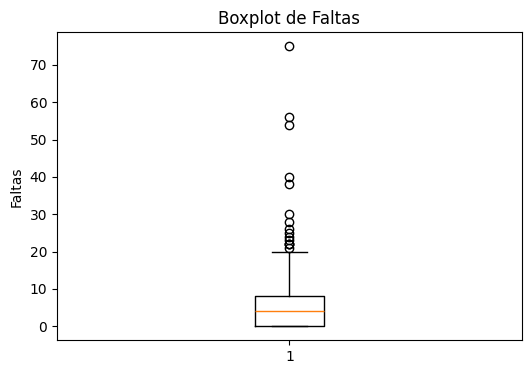

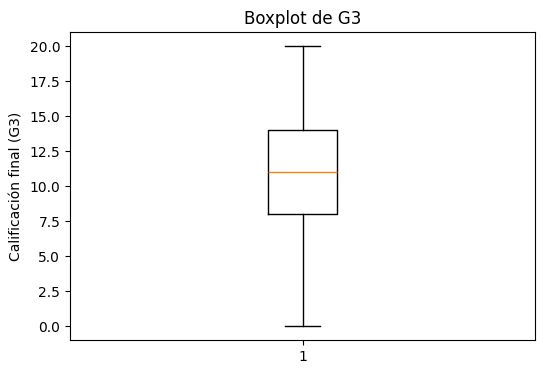

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.boxplot(df['Faltas'])
plt.title("Boxplot de Faltas")
plt.ylabel("Faltas")
plt.show()

plt.figure(figsize=(6,4))
plt.boxplot(df['G3'])
plt.title("Boxplot de G3")
plt.ylabel("Calificación final (G3)")
plt.show()



Un **boxplot** permite visualizar cómo se distribuyen los datos y detectar valores atípicos.

- La **caja** contiene el 50% central de los datos.
- La **línea dentro de la caja** representa la mediana.
- Los **lineas hrozontaless** indican los valores mínimos y máximos normales.
- Los **puntos fuera de las lineas horizontales** son valores atípicos (outliers).

# Análisis de valores atípicos (outliers)

### Faltas
La mayoría de los estudiantes tiene pocas faltas, lo cual se observa en una caja concentrada en valores bajos.  
Los puntos que aparecen por encima de los bigotes corresponden a estudiantes con muchas ausencias.  
Estos valores no son errores, sino casos reales, por lo que se mantuvieron en el análisis.

### G3 (calificación final)
Las calificaciones finales se concentran en un rango intermedio, lo que indica un comportamiento estable.  
No se observan puntos fuera de los bigotes, por lo que no existen valores atípicos relevantes en esta variable.




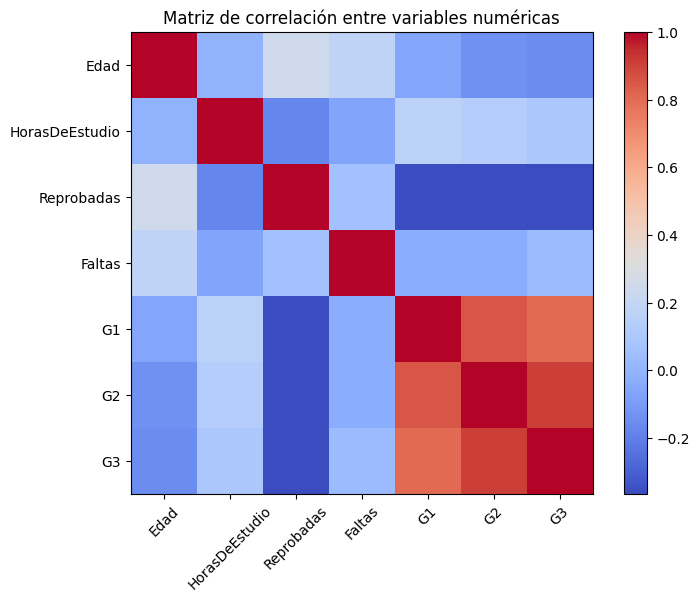

In [35]:
# Análisis de correlación entre variables numéricas
corr = num_vars.corr()

plt.figure(figsize=(8,6))
plt.imshow(corr, cmap='coolwarm')
plt.colorbar( )
plt.xticks(range(len(corr)),corr.columns, rotation=45)
plt.yticks(range(len(corr)),corr.columns)
plt.title("Matriz de correlación entre variables numéricas")
plt.show()

## *Análisis de relaciones entre variables*
La matriz muestra la correlación entre las variables numéricas del conjunto de datos. Como se observa, existe una **correlación positiva fuerte** entre las calificaciones parciales **G1**, **G2** y la calificación final **G3**, lo cual es consistente con el contexto del problema, ya que estas variables reflejan el desempeño académico del estudiante a lo largo del curso.

En particular, la alta correlación entre **G1 y G2** indica un posible problema de **colinealidad**, debido a que ambas variables aportan información similar sobre el rendimiento previo del alumno. Este resultado sugiere que incluir simultáneamente ambas variables en el modelo podría introducir redundancia, por lo que será necesario evaluar su impacto durante la etapa de selección de características.

Por otro lado, variables como **Faltas** y **Reprobadas** presentan correlaciones negativas moderadas con **G3**, lo cual es razonable, ya que un mayor número de faltas o reprobaciones previas tiende a asociarse con un menor desempeño final. En contraste, **Edad** y **HorasDeEstudio** muestran correlaciones débiles con la calificación final, lo que sugiere que su efecto predictivo podría ser limitado en comparación con las variables académicas directas.

Este análisis evidencia la necesidad de realizar un proceso de **selección de características**, con el objetivo de reducir colinealidad, mejorar la interpretabilidad del modelo y conservar únicamente las variables más informativas para la predicción de la calificación final.


In [25]:
# Variable objetivo
y = df['G3']

# Variables explicativas numéricas (sin G3)
X_num = df[['Edad', 'HorasDeEstudio', 'Reprobadas', 'Faltas', 'G1', 'G2']]


## *Selección de características*

La variable objetivo del modelo es **G3**, correspondiente a la calificación final del estudiante. Como variables explicativas iniciales se consideraron las variables numéricas **Edad**, **HorasDeEstudio**, **Reprobadas**, **Faltas**, **G1** y **G2**, dado que presentan una relación directa o indirecta con el desempeño académico.


In [36]:
# Conjunto 1: usando G1
X_G1 = df[['Edad', 'HorasDeEstudio', 'Reprobadas', 'Faltas', 'G1']]

# Conjunto 2: usando G2
X_G2 = df[['Edad', 'HorasDeEstudio', 'Reprobadas', 'Faltas', 'G2']]



Dado el alto nivel de colinealidad observado entre **G1** y **G2**, se decidió no incluir ambas variables simultáneamente. En su lugar, se construyeron dos conjuntos de variables explicativas: uno que incluye **G1** y otro que incluye **G2**, con el objetivo de comparar su desempeño predictivo y seleccionar la opción más adecuada.


In [27]:
from sklearn.model_selection import train_test_split

X1_train, X1_test, y_train, y_test = train_test_split(
    X_G1, y, test_size=0.3, random_state=42
)

X2_train, X2_test, _, _ = train_test_split(
    X_G2, y, test_size=0.3, random_state=42
)


Para evaluar el desempeño de los modelos y evitar fuga de datos, el conjunto de datos se dividió en subconjuntos de entrenamiento (70%) y prueba (30%). Todas las decisiones de entrenamiento se realizaron únicamente utilizando los datos de entrenamiento.


In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Modelo con G1
model_G1 = LinearRegression()
model_G1.fit(X1_train, y_train)
pred_G1 = model_G1.predict(X1_test)

# Modelo con G2
model_G2 = LinearRegression()
model_G2.fit(X2_train, y_train)
pred_G2 = model_G2.predict(X2_test)

# Métricas
r2_G1 = r2_score(y_test, pred_G1)
rmse_G1 = np.sqrt(mean_squared_error(y_test, pred_G1))

r2_G2 = r2_score(y_test, pred_G2)
rmse_G2 = np.sqrt(mean_squared_error(y_test, pred_G2))

r2_G1, rmse_G1, r2_G2, rmse_G2


(0.7010005348225337, 2.326921988324209, 0.8126971268646788, 1.8416997850133499)

In [15]:
# Evaluación en entrenamiento (modelo final con G2)
y_train_pred = model_G2.predict(X2_train)

r2_train = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

r2_train, rmse_train


(0.8342626785063181, 1.9002669193956063)

| Conjunto | R² | RMSE |
|---|---:|---:|
| Entrenamiento | 0.834 | 1.900 |
| Prueba | 0.813 | 1.842 |



El modelo presenta un desempeño similar en los datos de entrenamiento y de prueba.
Esto indica que el modelo generaliza bien y no muestra señales claras de sobreajuste.
La diferencia entre ambos conjuntos es pequeña, por lo que el procedimiento de partición evitó la fuga de datos.

Al comparar ambos modelos, se observó que el modelo que utiliza **G2** presenta un mejor desempeño en datos de prueba, reflejado en un mayor valor de R² y un menor error cuadrático medio (RMSE), en comparación con el modelo que utiliza **G1**.

Este resultado sugiere que **G2** captura de mejor manera el desempeño académico reciente del estudiante y aporta mayor información predictiva para la calificación final. Por esta razón, se seleccionó **G2** como variable explicativa y se descartó **G1**, reduciendo así la colinealidad y mejorando la interpretabilidad del modelo final.


In [16]:
coef_df = pd.DataFrame({
    "Variable": X_G2.columns,
    "Coeficiente": model_G2.coef_
}).sort_values(by="Coeficiente", key=lambda s: s.abs(), ascending=False)

coef_df


,Variable,Coeficiente
4,G2,1.078063
1,HorasDeEstudio,-0.176528
2,Reprobadas,-0.172431
0,Edad,-0.135133
3,Faltas,0.052148


## Interpretación de los coeficientes del modelo

La variable con mayor impacto en la calificación final es G2, lo cual tiene sentido porque representa el desempeño académico más reciente del estudiante.

Las variables Reprobadas y Edad muestran un efecto negativo, indicando que más materias reprobadas o una mayor edad se asocian con una menor calificación final.

HorasDeEstudio presenta un efecto pequeño y negativo, mientras que Faltas tiene un impacto muy reducido en comparación con G2, por lo que su influencia en el modelo es menor.

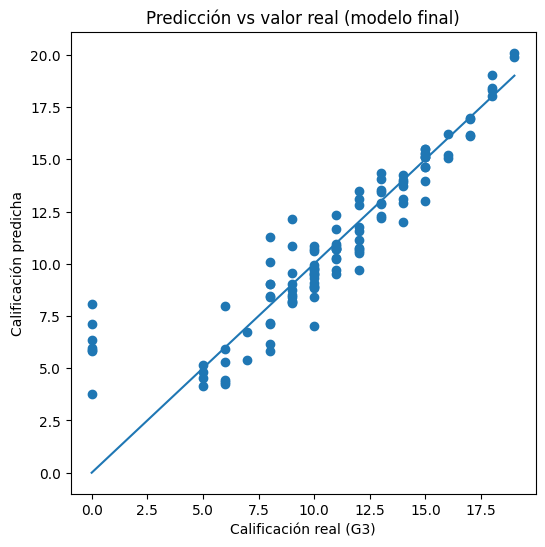

In [29]:
# Predicciones del modelo final (con G2)
y_pred = pred_G2

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()])
plt.xlabel("Calificación real (G3)")
plt.ylabel("Calificación predicha")
plt.title("Predicción vs valor real (modelo final)")
plt.show()


### *Evaluación visual del modelo*

La Figura muestra la relación entre las calificaciones reales y las calificaciones predichas por el modelo final de regresión lineal múltiple. Se observa que la mayoría de los puntos se concentran alrededor de la línea diagonal, lo que indica un buen nivel de ajuste y coherencia entre los valores reales y los valores estimados por el modelo.

La dispersión moderada alrededor de la diagonal sugiere que, si bien el modelo no es perfecto, captura de manera adecuada la tendencia general de los datos y produce predicciones razonablemente precisas para la calificación final.



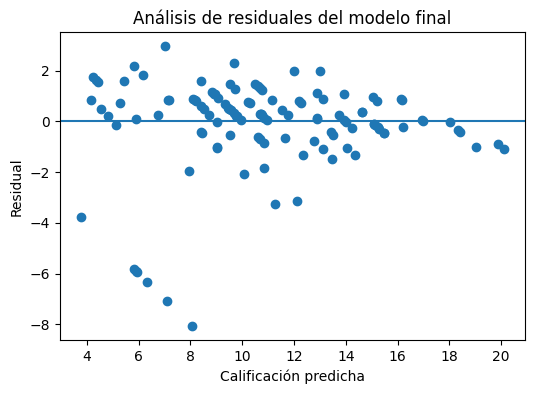

In [30]:
# Cálculo de residuales
residuals = y_test - y_pred

plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuals)
plt.axhline(0)
plt.xlabel("Calificación predicha")
plt.ylabel("Residual")
plt.title("Análisis de residuales del modelo final")
plt.show()


# *Resultados*

En esta sección se presentan y analizan los resultados obtenidos a partir del entrenamiento y evaluación de los modelos de regresión lineal múltiple propuestos para la predicción de la calificación final (G3).

## Comparación de modelos y selección de características

Con el fin de reducir la colinealidad identificada entre las calificaciones parciales G1 y G2, se entrenaron dos modelos independientes, cada uno utilizando una de estas variables como predictor principal junto con las variables Edad, HorasDeEstudio, Reprobadas y Faltas.

### Desempeño de los modelos evaluados

| Modelo | Variables explicativas | R² (test) | RMSE (test) |
|------|------------------------|-----------|-------------|
| Regresión con G1 | Edad, HorasDeEstudio, Reprobadas, Faltas, G1 | 0.701 | 2.327 |
| Regresión con G2 (modelo final) | Edad, HorasDeEstudio, Reprobadas, Faltas, G2 | 0.813 | 1.842 |

Los resultados muestran que el modelo que incluye G2 presenta un mejor desempeño en el conjunto de prueba, reflejado en un mayor coeficiente de determinación (R²) y un menor error cuadrático medio (RMSE) en comparación con el modelo que utiliza G1. Esto indica que G2 explica una mayor proporción de la variabilidad de la calificación final y genera predicciones más precisas.

## Interpretación del modelo final

El análisis del modelo final evidencia que la variable G2 es el predictor con mayor impacto positivo sobre la calificación final, lo cual es coherente al tratarse de una evaluación parcial reciente que refleja el desempeño académico inmediato del estudiante. Por otro lado, las variables Faltas y Reprobadas influyen de manera negativa en la predicción, indicando que un mayor número de ausencias o antecedentes de reprobación se asocian con un menor rendimiento final. Las variables Edad y HorasDeEstudio presentan una contribución menor, lo que sugiere que el desempeño académico previo es más relevante que factores demográficos o de contexto.

## Evaluación visual del modelo

La Figura de predicción contra valores reales muestra que la mayoría de los puntos se concentran alrededor de la línea diagonal, lo cual indica un buen nivel de ajuste entre las calificaciones reales y las predichas por el modelo. La dispersión observada es moderada, lo que sugiere que el modelo captura adecuadamente la tendencia general de los datos, aunque existen diferencias puntuales en algunos casos.

## Análisis de residuales

El análisis de residuales revela que estos se distribuyen mayormente alrededor de cero sin presentar patrones sistemáticos claros, lo cual sugiere que el modelo lineal es adecuado para describir la relación entre las variables seleccionadas y la calificación final. No obstante, se observan algunos residuales negativos de mayor magnitud, asociados a casos en los que el modelo tiende a sobreestimar la calificación real del estudiante. Estos comportamientos pueden atribuirse a factores no considerados en el modelo.

En conjunto, los resultados obtenidos son coherentes con el contexto académico del problema, ya que el rendimiento previo del estudiante resulta ser un mejor predictor de la calificación final que variables demográficas o de contexto.


## *Reflexión y conclusiones*
Se construyó un modelo de regresión lineal múltiple para predecir la calificación final (G3) a partir de datos reales cuidando la correcta identificación y preparación de las variables. No se detectaron valores faltantes pero sí registros duplicados los cuales se eliminaron para evitar sesgos.

El análisis mostró alta colinealidad entre G1 y G2, por lo que se realizó selección de características. Se determinó que G2 tiene mayor poder predictivo y menor error que G1, por lo que fue incluida en el modelo final.

El modelo, usando Edad, Horas de Estudio, Reprobadas, Faltas y G2, dio resultados consistentes y cercanos a los valores reales aunque algunos casos se desviaron. En general, el trabajo muestra que limpiar bien los datos y elegir las variables correctas es clave, y que el modelo puede mejorar en el futuro con métodos más avanzados.